# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
waves_filepath = 'C:/Users/Andre/Documents/GitHub/BEDU-Data-Analysis/data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv'
waves_data = pd.read_csv(waves_filepath, index_col=False)
waves_data = waves_data.rename(columns={"Date/Time":"time",
                                        'Hs':'wave_height',
                                        'Hmax':'max_wave_height',
                                        'Tz':'zero_upcrossing_wave_period',
                                        'Tp':'peak_energy_wave_period',
                                        'Peak Direction':'peak_direction',
                                        'SST':'temperature'})

In [21]:
waves_data.columns

Index(['time', 'wave_height', 'max_wave_height', 'zero_upcrossing_wave_period',
       'peak_energy_wave_period', 'peak_direction', 'temperature'],
      dtype='object')

* time: Time where the data was recorded (each 30 minutes), starting on 2020-01-01, ending on 2019-06-30.
* wave_height: Significant wave height, an average of the highest third of the waves in a record
* max_wave_height: The maximum wave height in the record
* zero_upcrossing_wave_period: The zero upcrossing wave period
* peak_energy_wave_period: The peak energy wave period
* peak_direction: Direction (related to true north) from which the peak period waves are coming from
* temperature: Approximation of sea surface temperature

## Data cleansing

In [3]:
waves_data_clean = waves_data[(waves_data.wave_height > 0) &
                              (waves_data.max_wave_height > 0) &
                              (waves_data.zero_upcrossing_wave_period > 0) &
                              (waves_data.peak_energy_wave_period > 0) &
                              (waves_data.peak_direction > 0) &
                              (waves_data.temperature > 0)]

In [4]:
waves_data_clean.tail()

,time,wave_height,max_wave_height,zero_upcrossing_wave_period,peak_energy_wave_period,peak_direction,temperature
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95
43727,30/06/2019 23:30,1.926,2.98,8.509,12.228,84.0,21.95


In [5]:
waves_data_clean.describe()

,wave_height,max_wave_height,zero_upcrossing_wave_period,peak_energy_wave_period,peak_direction,temperature
count,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000
mean,1.237799,2.090125,5.619685,9.011972,98.626594,23.949641
std,0.528608,0.897640,0.928533,2.390107,24.275165,2.231022
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000
25%,0.839000,1.410000,4.981000,7.292000,85.000000,21.900000
50%,1.130000,1.900000,5.530000,8.886000,101.000000,23.950000
75%,1.544000,2.600000,6.166000,10.677000,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


## Small sample visualization

In [6]:
sample_for_vis = waves_data_clean.iloc[41727:] #42727
sample_for_vis

,time,wave_height,max_wave_height,zero_upcrossing_wave_period,peak_energy_wave_period,peak_direction,temperature
41994,25/05/2019 21:00,0.751,1.34,5.605,7.050,84.0,23.20
41995,25/05/2019 21:30,0.735,1.02,5.500,7.091,77.0,23.20
41996,25/05/2019 22:00,0.745,1.16,5.334,7.482,80.0,23.20
41997,25/05/2019 22:30,0.800,1.23,5.717,7.876,81.0,23.20
41998,25/05/2019 23:00,0.703,1.24,5.189,7.569,80.0,23.20
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


### Correlation matrix

<AxesSubplot:>

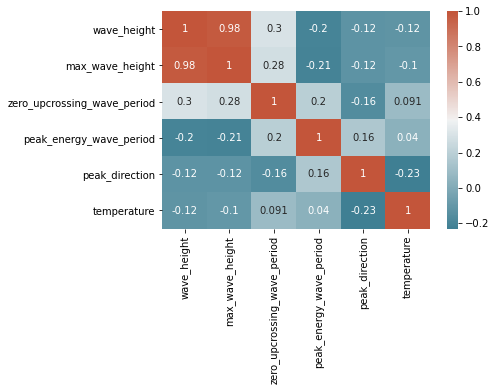

In [7]:
# calculate correlation matrix
corr = sample_for_vis.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

The top strongest correlations are the following:
- wave_height vs. max_wave_height (0.98)
- wave_height vs. zero_upcrossing_wave_period (0.3)
- max_wave_height vs. zero_upcrossing_wave_period (0.28)

### Pairplotting to visualize the correlation matrix. 

<Figure size 432x432 with 0 Axes>

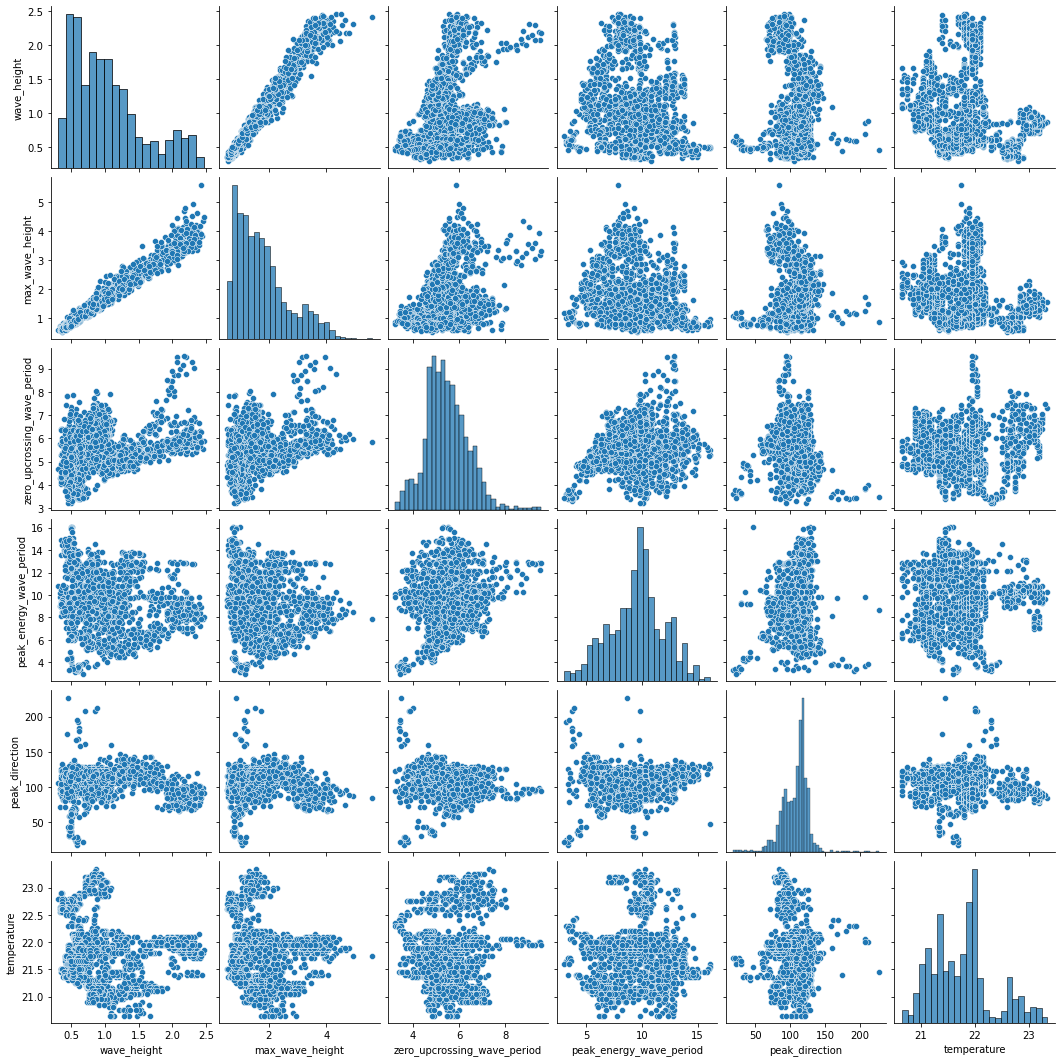

In [8]:
plt.figure(figsize=(6,6))

sns.pairplot(sample_for_vis)

The pairplot confirms that only wave_height vs. max_wave_height (corr = 0.98) have a strong relationship.

### Plotting each variable vs time

[[<matplotlib.axis.XTick at 0x2546a095700>,

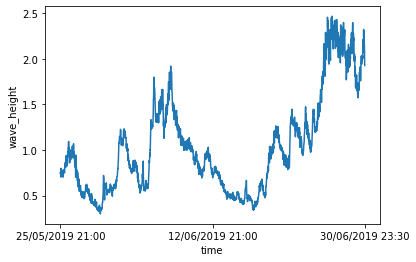

In [15]:
sns.lineplot(x=sample_for_vis['time'], y=sample_for_vis['wave_height'])\
    .set(xticks=[0,863,1726])

[[<matplotlib.axis.XTick at 0x2546bace1c0>,

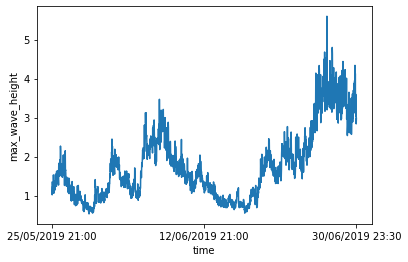

In [16]:
sns.lineplot(x=sample_for_vis['time'], y=sample_for_vis['max_wave_height'])\
    .set(xticks=[0,863,1726])

[[<matplotlib.axis.XTick at 0x25466bea6a0>,

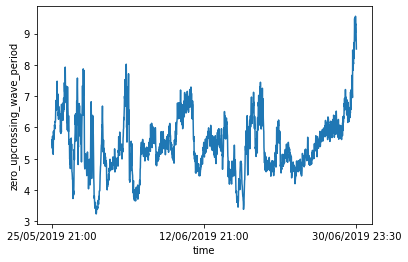

In [17]:
sns.lineplot(x=sample_for_vis['time'], y=sample_for_vis['zero_upcrossing_wave_period'])\
    .set(xticks=[0,863,1726])

[[<matplotlib.axis.XTick at 0x2546fef6cd0>,

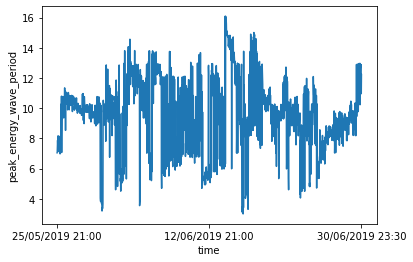

In [18]:
sns.lineplot(x=sample_for_vis['time'], y=sample_for_vis['peak_energy_wave_period'])\
    .set(xticks=[0,863,1726])

[[<matplotlib.axis.XTick at 0x25471935460>,

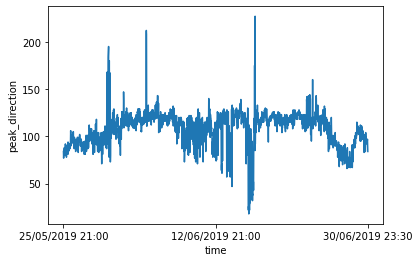

In [19]:
sns.lineplot(x=sample_for_vis['time'], y=sample_for_vis['peak_direction'])\
    .set(xticks=[0,863,1726])

[[<matplotlib.axis.XTick at 0x25473358340>,

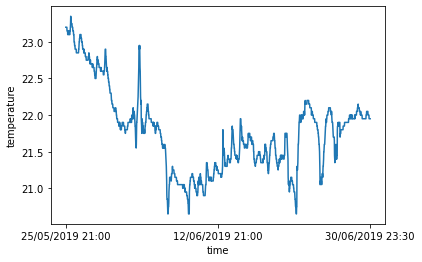

In [20]:
sns.lineplot(x=sample_for_vis['time'], y=sample_for_vis['temperature'])\
    .set(xticks=[0,863,1726])